In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
day1 = datetime.fromisoformat('2020-03-23')
n_days = 35
list_day = ['Mar 23', 'Mar 24', 'Mar 25', 'Mar 26', 'Mar 27', 'Mar 28', 'Mar 29', 'Mar 30', 'Mar 31',
            'Apr 1', 'Apr 2', 'Apr 3', 'Apr 4', 'Apr 5', 'Apr 6', 'Apr 7', 'Apr 8', 'Apr 9', 'Apr 10',
            'Apr 11', 'Apr 12', 'Apr 13', 'Apr 14', 'Apr 15', 'Apr 16', 'Apr 17', 'Apr 18', 'Apr 19', 'Apr 20',
            'Apr 21', 'Apr 22', 'Apr 23', 'Apr 24', 'Apr 25', 'Apr 26']

States = ['Connecticut', 'Delaware', 'Massachusetts', 'Maryland', 'Maine', 'New Hampshire', 'New Jersey',
          'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [3]:
def get_pol_by_county(df, day1, n_days, columns_num, list_day, decimal):
    df['date_diff'] = (df['Date'] - day1).dt.days
    df = df[df['date_diff'] >= 0]
    df = df.reset_index(drop=True)
    counties = df['COUNTY'].unique()
    
    State_pollution = [[np.nan] * n_days for i in range(len(counties))]
    
    county2int = {}
    for i, county in enumerate(counties):
        county2int[county] = i
        
    for county in counties:
        df_county = df[df['COUNTY'] == county]
        county_number = county2int[county]
        for date in range(n_days):
            element = np.mean(df_county[df_county['date_diff'] == date].iloc[:,columns_num])
            State_pollution[county_number][date] = np.around(element, decimal).astype(np.float32)
    
    df_State_pollution = pd.DataFrame(State_pollution, columns=list_day, index=counties)
    
    return df_State_pollution

In [4]:
NorEasStates = ['CT', 'DE', 'MA', 'MD', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']

In [5]:
PM25 = []
for state in NorEasStates:
    df = pd.read_csv(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/Air_pollution/PM25/PM25_{state}.csv',
                           parse_dates=[0])
    PM25.append(get_pol_by_county(df, day1, n_days, 4, list_day, 2))

In [6]:
CO_States = ['DE', 'MA', 'MD', 'ME', 'NY']
CO_States_full = ['Delaware', 'Massachusetts', 'Maryland', 'Maine', 'New York']
CO = []
for state in CO_States:
    df = pd.read_csv(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/Air_pollution/CO/CO_{state}.csv',
                           parse_dates=[0])
    CO.append(get_pol_by_county(df, day1, n_days, 4, list_day, 2))

In [7]:
df_CO = pd.DataFrame()

for i, df in enumerate(CO):

    for column in df.transpose().columns:
        df_county = pd.DataFrame(np.array([np.repeat(CO_States_full[i], n_days), np.repeat(column, n_days),
                                           df.transpose()[column], df.transpose().index]).T,
                                 columns=['State', 'County', 'CO', 'Date'])
        df_CO = pd.concat([df_CO, df_county])

df_CO = df_CO.reset_index(drop=True)

In [8]:
NO2_States = ['DE', 'MA', 'MD', 'ME', 'NY']
NO2_States_full = ['Delaware', 'Massachusetts', 'Maryland', 'Maine', 'New York']
NO2 = []
for state in NO2_States:
    df = pd.read_csv(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/Air_pollution/NO2/NO2_{state}.csv',
                           parse_dates=[0])
    NO2.append(get_pol_by_county(df, day1, n_days, 4, list_day, 2))

In [9]:
df_NO2 = pd.DataFrame()

for i, df in enumerate(NO2):

    for column in df.transpose().columns:
        df_county = pd.DataFrame(np.array([np.repeat(NO2_States_full[i], n_days), np.repeat(column, n_days),
                                           df.transpose()[column], df.transpose().index]).T,
                                 columns=['State', 'County', 'NO2', 'Date'])
        df_NO2 = pd.concat([df_NO2, df_county])

df_NO2 = df_NO2.reset_index(drop=True)

In [10]:
df_NO2

,State,County,NO2,Date
0,Maryland,Baltimore,15.2,Mar 23
1,Maryland,Baltimore,22.6,Mar 24
2,Maryland,Baltimore,19,Mar 25
3,Maryland,Baltimore,23.45,Mar 26
4,Maryland,Baltimore,26.45,Mar 27
...,...,...,...,...
100,Maine,Cumberland,NaN,Apr 22
101,Maine,Cumberland,NaN,Apr 23
102,Maine,Cumberland,NaN,Apr 24
103,Maine,Cumberland,NaN,Apr 25


In [20]:
Ozone = []
for state in NorEasStates:
    df = pd.read_csv(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/Air_pollution/Ozone/Ozone_{state}.csv',
                           parse_dates=[0])
    Ozone.append(get_pol_by_county(df, day1, n_days, 4, list_day, 4))

In [21]:
df_Ozone = pd.DataFrame()

for i, df in enumerate(Ozone):

    for column in df.transpose().columns:
        df_county = pd.DataFrame(np.array([np.repeat(States[i], n_days), np.repeat(column, n_days),
                                           df.transpose()[column], df.transpose().index]).T,
                                 columns=['State', 'County', 'Ozone', 'Date'])
        df_Ozone = pd.concat([df_Ozone, df_county])

df_Ozone = df_Ozone.reset_index(drop=True)

In [22]:
df_Ozone

,State,County,Ozone,Date
0,Connecticut,Fairfield,0.0425,Mar 23
1,Connecticut,Fairfield,0.0427,Mar 24
2,Connecticut,Fairfield,0.0395,Mar 25
3,Connecticut,Fairfield,0.0407,Mar 26
4,Connecticut,Fairfield,0.048,Mar 27
...,...,...,...,...
4685,Vermont,Rutland,0.046,Apr 22
4686,Vermont,Rutland,0.048,Apr 23
4687,Vermont,Rutland,0.046,Apr 24
4688,Vermont,Rutland,0.048,Apr 25


In [23]:
PM10_States = ['ME', 'NY']
PM10 = []
for state in PM10_States:
    df = pd.read_csv(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/Air_pollution/PM10/PM10_{state}.csv',
                           parse_dates=[0])
    PM10.append(get_pol_by_county(df, day1, n_days, 4, list_day))

TypeError: get_pol_by_county() missing 1 required positional argument: 'decimal'

In [ ]:
df_PM10 = pd.DataFrame()

for i, df in enumerate(PM10):

    for column in df.transpose().columns:
        df_county = pd.DataFrame(np.array([np.repeat(States[i], n_days), np.repeat(column, n_days),
                                           df.transpose()[column], df.transpose().index]).T,
                                 columns=['State', 'County', 'PM10', 'Date'])
        df_PM10 = pd.concat([df_PM10, df_county])

df_PM10 = df_PM10.reset_index(drop=True)

In [ ]:
df_PM10

PM10 was not measured after February.

In [25]:
SO2_States = ['DE', 'MA', 'MD', 'ME', 'NY']
SO2_States_full = ['Delaware', 'Massachusetts', 'Maryland', 'Maine', 'New York']
SO2 = []
for state in SO2_States:
    df = pd.read_csv(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/Air_pollution/SO2/SO2_{state}.csv',
                           parse_dates=[0])
    SO2.append(get_pol_by_county(df, day1, n_days, 4, list_day, 2))

In [26]:
df_SO2 = pd.DataFrame()

for i, df in enumerate(SO2):

    for column in df.transpose().columns:
        df_county = pd.DataFrame(np.array([np.repeat(SO2_States_full[i], n_days), np.repeat(column, n_days),
                                           df.transpose()[column], df.transpose().index]).T,
                                 columns=['State', 'County', 'SO2', 'Date'])
        df_SO2 = pd.concat([df_SO2, df_county])

df_SO2 = df_SO2.reset_index(drop=True)

In [27]:
df_pm2_5 = pd.DataFrame()

for i, df in enumerate(PM25):

    for column in df.transpose().columns:
        df_county = pd.DataFrame(np.array([np.repeat(States[i], n_days), np.repeat(column, n_days),
                                           df.transpose()[column], df.transpose().index]).T,
                                 columns=['State', 'County', 'PM2.5', 'Date'])
        df_pm2_5 = pd.concat([df_pm2_5, df_county])

In [28]:
df_pm2_5 = df_pm2_5.reset_index(drop=True)

In [29]:
df_pm2_5['PM2.5'] = df_pm2_5['PM2.5'].astype('float64')

In [30]:
df_air_pollution = df_pm2_5.copy()

In [31]:
df_air_pollution['CO'] = np.nan
df_air_pollution['NO2'] = np.nan
df_air_pollution['Ozone'] = np.nan
df_air_pollution['SO2'] = np.nan

In [32]:
counties = df_air_pollution.County.unique()

In [33]:
for index, row in df_CO.iterrows():
    if row['County'] in counties:
        df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']) & (df_air_pollution['Date']==row['Date']), 'CO'] = row['CO']
    else:
        pass

In [34]:
for index, row in df_NO2.iterrows():
    if row['County'] in counties:
        df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']) & (df_air_pollution['Date']==row['Date']), 'NO2'] = row['NO2']
    else:
        pass

In [35]:
for index, row in df_Ozone.iterrows():
    if row['County'] in counties:
        df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']) & (df_air_pollution['Date']==row['Date']), 'Ozone'] = row['Ozone']
    else:
        pass

In [36]:
for index, row in df_SO2.iterrows():
    if row['County'] in counties:
        df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']) & (df_air_pollution['Date']==row['Date']), 'SO2'] = row['SO2']
    else:
        pass

In [37]:
num_Mar = ['23', '24', '25', '26', '27', '28', '29', '30', '31']
num_Apr = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
          '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
          '21', '22', '23', '24', '25', '26']

In [38]:
def get_case_state(dfs, States, num_Mar, num_Apr):

    df_cases = pd.DataFrame()
    
    for df, state in zip(dfs, States):
        counties = df.index
        n_county = len(counties)
        
        np_case_state = np.zeros((n_county, n_days, 4)).astype(int)
        
        county2int = {}
        for i, county in enumerate(counties):
            county2int[county] = i
        
        for i, num in enumerate(num_Mar):

            with open(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-{num}-2020.csv') as csvfile:
                reader = csv.reader(csvfile)
                next(reader) # skip header\n",

                for row in reader:
                    if row[2] == state:
                        county = row[1]
                        if county in county2int:
                            county_number = county2int[county]
                            np_case_state[county_number, i, 0:4] = [int(row[7]), int(row[8]), int(row[9]), int(row[10])]
                        else:
                            pass
                    else:
                        pass

        for i, num in enumerate(num_Apr):

            with open(f'C:/Users/ogmcd/Dropbox/00_2019_Class/Spring/BMI706/Project/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-{num}-2020.csv') as csvfile:
                reader = csv.reader(csvfile)
                next(reader) # skip header\n",

                for row in reader:
                    if row[2] == state:
                        county = row[1]
                        if county in county2int:
                            county_number = county2int[county]
                            np_case_state[county_number, i+9, 0:4] = [int(row[7]), int(row[8]), int(row[9]), int(row[10])]
                        else:
                            pass
                    else:
                        pass

        #index = []
        #for i in range(n_county):
        #    for day in df.columns:
        #        index.append(day)
                    
        df_case_state = pd.DataFrame(np_case_state.reshape(-1, 4),
                                     columns=['total_confirmed_cases', 'Deaths', 'Recovered', 'Active'])
        
        df_cases = pd.concat([df_cases, df_case_state])
        
    df_cases = df_cases.reset_index(drop=True)
    
    return df_cases

In [39]:
df_n_cases = get_case_state(PM25, States, num_Mar, num_Apr)

In [40]:
df_n_cases

,total_confirmed_cases,Deaths,Recovered,Active
0,270,6,0,0
1,384,7,0,0
2,546,12,0,0
3,607,13,0,0
4,752,15,0,0
...,...,...,...,...
3145,44,1,0,43
3146,44,1,0,43
3147,44,1,0,43
3148,44,1,0,43


In [41]:
df = df_air_pollution.join(df_n_cases)

In [42]:
df

,State,County,PM2.5,Date,CO,NO2,Ozone,SO2,total_confirmed_cases,Deaths,Recovered,Active
0,Connecticut,Fairfield,4.75,Mar 23,NaN,NaN,0.0425,NaN,270,6,0,0
1,Connecticut,Fairfield,3.35,Mar 24,NaN,NaN,0.0427,NaN,384,7,0,0
2,Connecticut,Fairfield,6.80,Mar 25,NaN,NaN,0.0395,NaN,546,12,0,0
3,Connecticut,Fairfield,7.30,Mar 26,NaN,NaN,0.0407,NaN,607,13,0,0
4,Connecticut,Fairfield,6.30,Mar 27,NaN,NaN,0.0480,NaN,752,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Vermont,Rutland,3.90,Apr 22,NaN,NaN,0.0460,NaN,44,1,0,43
3146,Vermont,Rutland,6.70,Apr 23,NaN,NaN,0.0480,NaN,44,1,0,43
3147,Vermont,Rutland,7.70,Apr 24,NaN,NaN,0.0460,NaN,44,1,0,43
3148,Vermont,Rutland,8.70,Apr 25,NaN,NaN,0.0480,NaN,44,1,0,43


In [43]:
df2 = df.copy()
df2 = df2.iloc[:,[0,1,3,2,4,5,6,7,8,9,10,11]]

In [44]:
df2.describe()

,PM2.5,CO,NO2,Ozone,SO2,total_confirmed_cases,Deaths,Recovered,Active
count,2942.000000,49.000000,26.000000,2783.000000,27.000000,3150.000000,3150.000000,3150.0,3150.000000
mean,5.527427,0.230612,12.550000,0.042152,0.185185,1003.684444,40.809206,0.0,710.308571
std,2.621650,0.104491,9.914202,0.005379,0.106351,2167.353511,112.520786,0.0,1996.866561
min,-1.400000,0.100000,1.000000,0.021000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.650000,0.200000,3.150000,0.039000,0.100000,22.000000,0.000000,0.0,0.000000
50%,5.300000,0.200000,10.200000,0.043000,0.200000,151.000000,2.000000,0.0,0.000000
75%,7.200000,0.200000,20.237500,0.046000,0.300000,752.750000,22.000000,0.0,248.500000
max,20.500000,0.500000,33.500000,0.069000,0.400000,14965.000000,1023.000000,0.0,14010.000000


In [45]:
df.to_csv('PM2_5.csv')

In [46]:
df2.to_csv('Air_pollution_COVID_cases_daily.csv')

In [47]:
state_county_array = np.array([[],
                                []])

for df, state in zip(PM25, States):
    county = df.index
    state_name = np.repeat(state, len(county))
    state_county = np.vstack((county, state_name))
    state_county_array = np.hstack((state_county_array, state_county))

In [54]:
candidates = pd.DataFrame(state_county_array.T, columns=['County', 'State'])

In [55]:
candidates['Avr_PM2.5'] = np.nan
candidates['Avr_CO'] = np.nan
candidates['Avr_NO2'] = np.nan
candidates['Avr_Ozone'] = np.nan
candidates['Avr_SO2'] = np.nan

In [56]:
candidates

,County,State,Avr_PM2.5,Avr_CO,Avr_NO2,Avr_Ozone,Avr_SO2
0,Fairfield,Connecticut,NaN,NaN,NaN,NaN,NaN
1,Hartford,Connecticut,NaN,NaN,NaN,NaN,NaN
2,Litchfield,Connecticut,NaN,NaN,NaN,NaN,NaN
3,New Haven,Connecticut,NaN,NaN,NaN,NaN,NaN
4,New London,Connecticut,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
85,Providence,Rhode Island,NaN,NaN,NaN,NaN,NaN
86,Washington,Rhode Island,NaN,NaN,NaN,NaN,NaN
87,Bennington,Vermont,NaN,NaN,NaN,NaN,NaN
88,Chittenden,Vermont,NaN,NaN,NaN,NaN,NaN


In [57]:
for index, row in candidates.iterrows():
    candidates.iloc[index, 2] = round(df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']), 'PM2.5'].mean(), 2)
    candidates.iloc[index, 3] = round(df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']), 'CO'].mean(), 2)
    candidates.iloc[index, 4] = round(df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']), 'NO2'].mean(), 2)
    candidates.iloc[index, 5] = round(df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']), 'Ozone'].mean(), 5)
    candidates.iloc[index, 6] = round(df_air_pollution.loc[(df_air_pollution['State']==row['State']) & (df_air_pollution['County']==row['County']), 'SO2'].mean(), 2)

In [58]:
candidates.describe()

,Avr_PM2.5,Avr_CO,Avr_NO2,Avr_Ozone,Avr_SO2
count,90.000000,5.00000,3.000000,83.000000,3.000000
mean,5.547222,0.23200,12.166667,0.042093,0.183333
std,1.499718,0.08438,8.900569,0.002307,0.060277
min,1.870000,0.14000,2.320000,0.036460,0.120000
25%,4.470000,0.18000,8.430000,0.040600,0.155000
50%,5.560000,0.20000,14.540000,0.042650,0.190000
75%,6.525000,0.30000,17.090000,0.043790,0.215000
max,10.110000,0.34000,19.640000,0.048300,0.240000


## Warnings
Already created county_state_all.csv file. Do not overwrite.

In [59]:
#candidates.to_csv('county_state_all.csv', index=False)

In [60]:
candidates_full = pd.read_csv('county_state_all.csv')

In [61]:
candidates_full['Cases'] = np.nan
candidates_full['Deaths'] = np.nan

In [62]:
candidates_full

,County,State,Avr_PM2.5,Avr_CO,Avr_NO2,Avr_Ozone,Avr_SO2,Population,Area,Poverty_all,Poverty_child,Cases,Deaths
0,Fairfield,Connecticut,5.70,NaN,NaN,0.04501,NaN,916829,1621,10.0,12.7,NaN,NaN
1,Hartford,Connecticut,5.56,NaN,NaN,0.04300,NaN,894014,1906,11.2,15.5,NaN,NaN
2,Litchfield,Connecticut,4.13,NaN,NaN,0.04451,NaN,189927,2383,6.9,8.1,NaN,NaN
3,New Haven,Connecticut,6.09,NaN,NaN,0.04477,NaN,862477,1570,11.6,16.7,NaN,NaN
4,New London,Connecticut,5.60,NaN,NaN,0.04437,NaN,274055,1725,9.8,12.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Providence,Rhode Island,3.76,NaN,NaN,NaN,NaN,626667,1059,16.1,22.7,NaN,NaN
86,Washington,Rhode Island,2.39,NaN,NaN,0.03700,NaN,126979,852,8.0,9.7,NaN,NaN
87,Bennington,Vermont,4.19,NaN,NaN,0.04403,NaN,36317,1751,11.4,16.5,NaN,NaN
88,Chittenden,Vermont,4.74,NaN,NaN,0.04545,NaN,161382,1396,10.4,8.0,NaN,NaN


In [63]:
df2

,State,County,Date,PM2.5,CO,NO2,Ozone,SO2,total_confirmed_cases,Deaths,Recovered,Active
0,Connecticut,Fairfield,Mar 23,4.75,NaN,NaN,0.0425,NaN,270,6,0,0
1,Connecticut,Fairfield,Mar 24,3.35,NaN,NaN,0.0427,NaN,384,7,0,0
2,Connecticut,Fairfield,Mar 25,6.80,NaN,NaN,0.0395,NaN,546,12,0,0
3,Connecticut,Fairfield,Mar 26,7.30,NaN,NaN,0.0407,NaN,607,13,0,0
4,Connecticut,Fairfield,Mar 27,6.30,NaN,NaN,0.0480,NaN,752,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Vermont,Rutland,Apr 22,3.90,NaN,NaN,0.0460,NaN,44,1,0,43
3146,Vermont,Rutland,Apr 23,6.70,NaN,NaN,0.0480,NaN,44,1,0,43
3147,Vermont,Rutland,Apr 24,7.70,NaN,NaN,0.0460,NaN,44,1,0,43
3148,Vermont,Rutland,Apr 25,8.70,NaN,NaN,0.0480,NaN,44,1,0,43


In [64]:
for index, row in candidates_full.iterrows():
    candidates_full.iloc[index, 11] = df2.loc[(df2['State']==row['State']) & (df2['County']==row['County']), 'total_confirmed_cases'].max()
    candidates_full.iloc[index, 12] = df2.loc[(df2['State']==row['State']) & (df2['County']==row['County']), 'Deaths'].max()

In [65]:
candidates_full['Cases'] = candidates_full['Cases'].astype('int')
candidates_full['Deaths'] = candidates_full['Deaths'].astype('int')

In [66]:
candidates_full

,County,State,Avr_PM2.5,Avr_CO,Avr_NO2,Avr_Ozone,Avr_SO2,Population,Area,Poverty_all,Poverty_child,Cases,Deaths
0,Fairfield,Connecticut,5.70,NaN,NaN,0.04501,NaN,916829,1621,10.0,12.7,10529,707
1,Hartford,Connecticut,5.56,NaN,NaN,0.04300,NaN,894014,1906,11.2,15.5,4989,579
2,Litchfield,Connecticut,4.13,NaN,NaN,0.04451,NaN,189927,2383,6.9,8.1,864,74
3,New Haven,Connecticut,6.09,NaN,NaN,0.04477,NaN,862477,1570,11.6,16.7,6715,429
4,New London,Connecticut,5.60,NaN,NaN,0.04437,NaN,274055,1725,9.8,12.5,498,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Providence,Rhode Island,3.76,NaN,NaN,NaN,NaN,626667,1059,16.1,22.7,5266,3
86,Washington,Rhode Island,2.39,NaN,NaN,0.03700,NaN,126979,852,8.0,9.7,292,0
87,Bennington,Vermont,4.19,NaN,NaN,0.04403,NaN,36317,1751,11.4,16.5,40,1
88,Chittenden,Vermont,4.74,NaN,NaN,0.04545,NaN,161382,1396,10.4,8.0,410,30


In [67]:
candidates_full['Pop_density'] = round(candidates_full['Population']/candidates_full['Area'], 2)
candidates_full['Case_per_thousand'] = round(1000*candidates_full['Cases']/candidates_full['Population'], 2)
candidates_full['Death_per_M'] = round(1000000*candidates_full['Deaths']/candidates_full['Population'], 2)
candidates_full['Mortality'] = round(100*candidates_full['Deaths']/candidates_full['Cases'], 2)

In [68]:
candidates_final = candidates_full.iloc[:,[0,1,2,3,4,5,6,7,8,13,9,10,11,12,14,15,16]]
candidates_final.loc[candidates_final['Cases']==0,'Mortality'] = 0

In [69]:
candidates_final.describe()

,Avr_PM2.5,Avr_CO,Avr_NO2,Avr_Ozone,Avr_SO2,Population,Area,Pop_density,Poverty_all,Poverty_child,Cases,Deaths,Case_per_thousand,Death_per_M,Mortality
count,90.000000,5.00000,3.000000,83.000000,3.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.547222,0.23200,12.166667,0.042093,0.183333,3.975732e+05,2031.288889,526.866556,11.275556,15.231111,2352.044444,123.622222,4.019444,207.142889,4.523222
std,1.499718,0.08438,8.900569,0.002307,0.060277,3.954995e+05,2162.733659,1053.336449,3.561382,5.755498,3772.384100,217.953741,4.541756,270.114095,3.750059
min,1.870000,0.14000,2.320000,0.036460,0.120000,2.019100e+04,122.000000,3.880000,4.400000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.470000,0.18000,8.430000,0.040600,0.155000,1.162428e+05,1090.750000,64.212500,8.300000,10.725000,70.750000,2.000000,0.672500,16.860000,1.965000
50%,5.560000,0.20000,14.540000,0.042650,0.190000,2.570255e+05,1533.500000,161.920000,11.250000,15.250000,531.000000,23.500000,2.380000,103.665000,4.220000
75%,6.525000,0.30000,17.090000,0.043790,0.215000,6.057512e+05,2259.250000,467.510000,13.775000,19.175000,2975.750000,137.500000,5.712500,274.080000,6.340000
max,10.110000,0.34000,19.640000,0.048300,0.240000,2.230722e+06,17687.000000,5541.480000,24.300000,34.000000,14965.000000,1023.000000,21.240000,1279.120000,16.130000


In [70]:
candidates_final.to_csv('county_state_final.csv', index=False)

In [71]:
from pandas.plotting import scatter_matrix

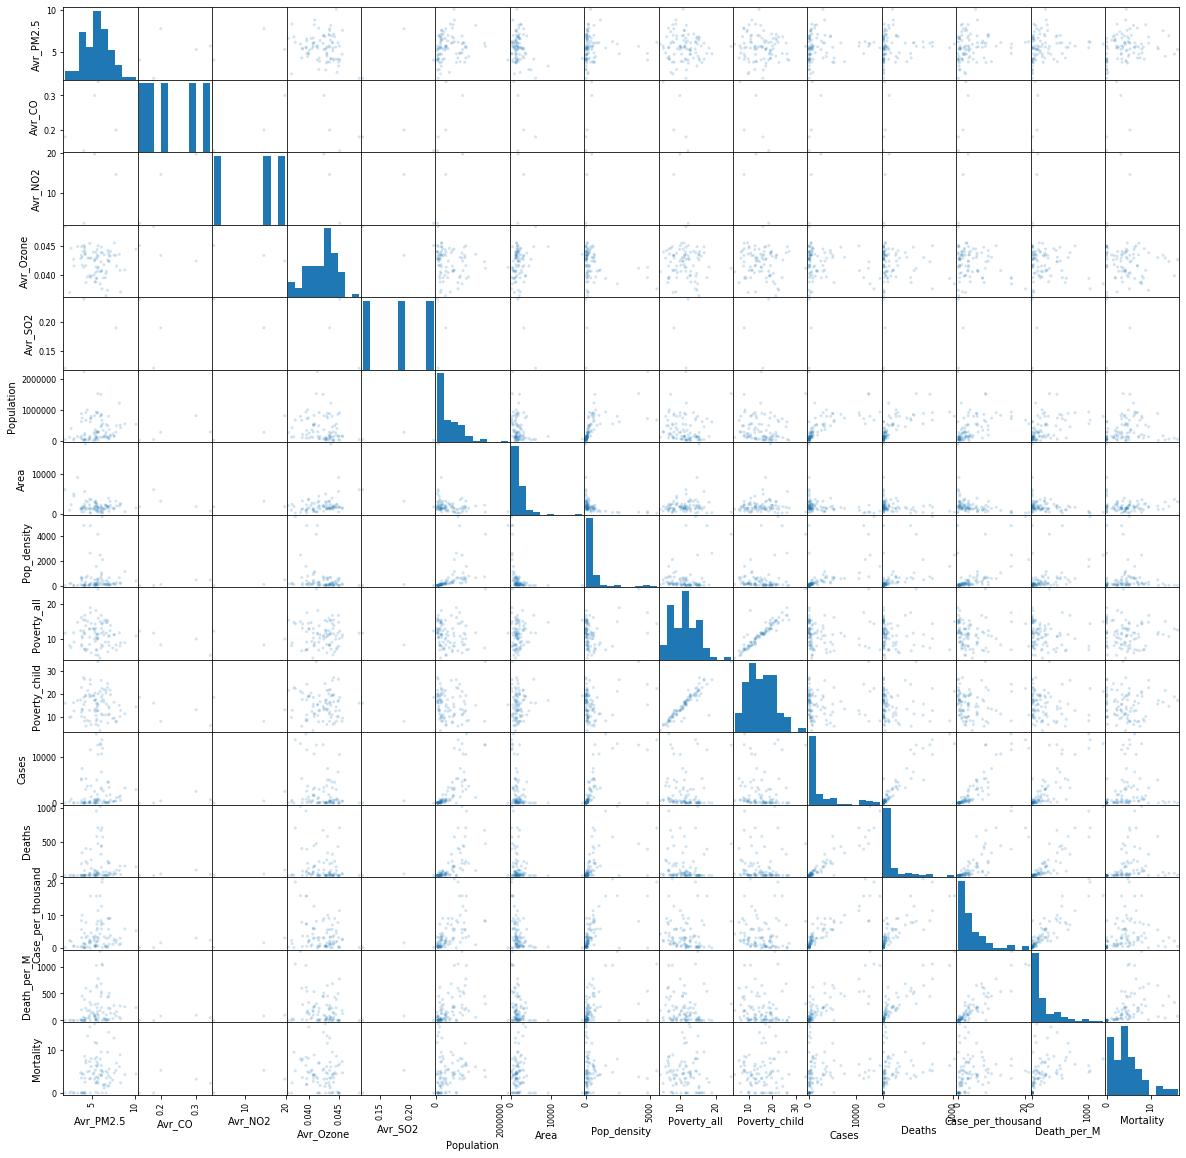

In [72]:
scatter_matrix(candidates_final, alpha=0.2, figsize=(20,20))
plt.show()

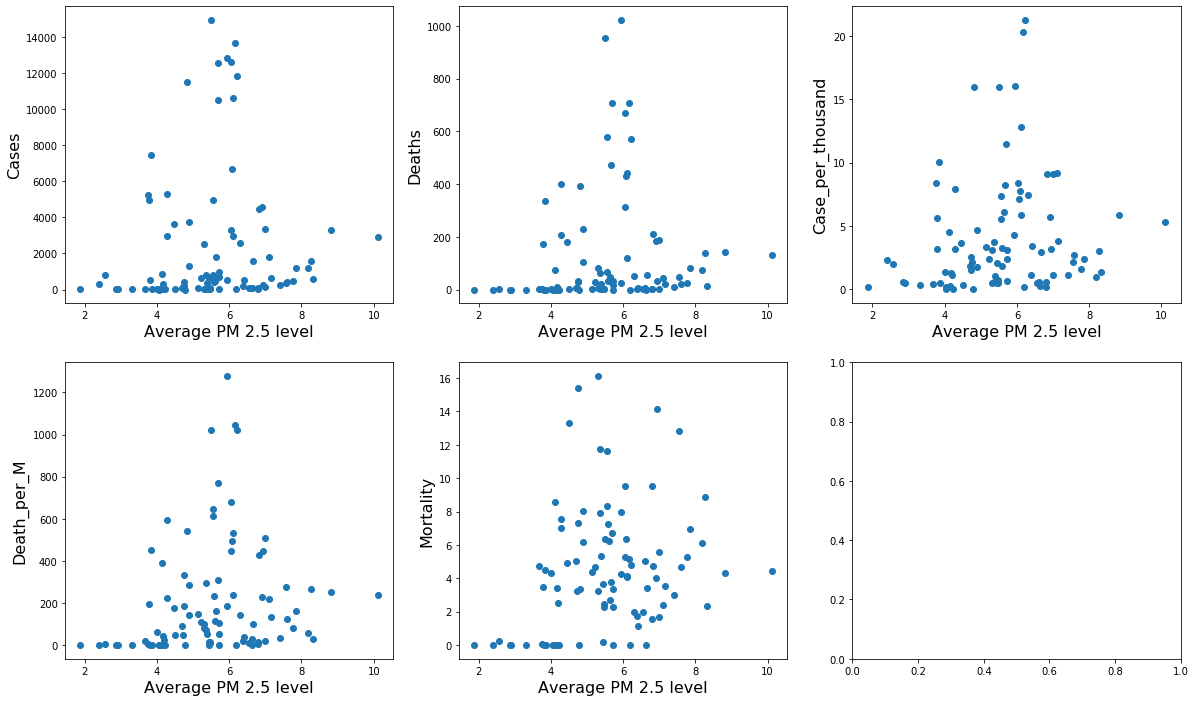

In [73]:
fig, ax = plt.subplots(2,3,figsize=(20,12))

Sca_col = ['Cases', 'Deaths', 'Case_per_thousand', 'Death_per_M', 'Mortality']

for i, col in enumerate(Sca_col):
    ax[i//3][i%3].scatter(candidates_final['Avr_PM2.5'], candidates_final[col])
    ax[i//3][i%3].set_xlabel('Average PM 2.5 level', fontsize=16)
    ax[i//3][i%3].set_ylabel(col, fontsize=16)

plt.savefig('scatter_pm2_5.png', bbox_inches="tight", pad_inches=0.1)

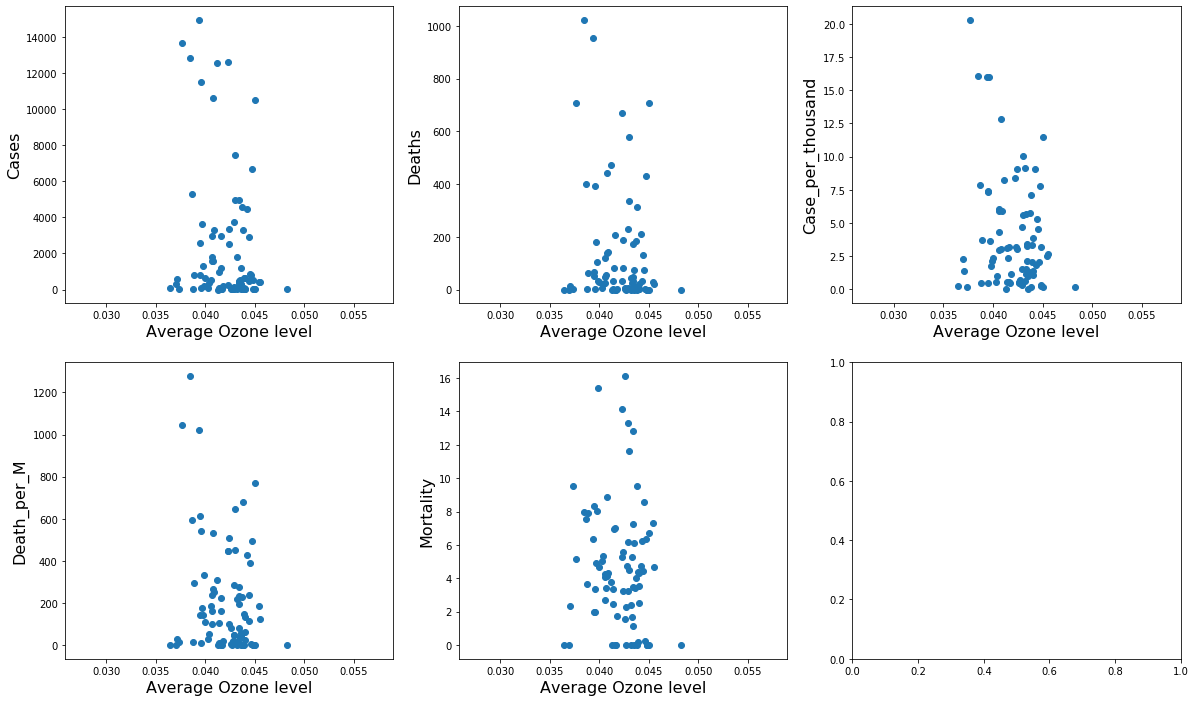

In [74]:
fig, ax = plt.subplots(2,3,figsize=(20,12))

Sca_col = ['Cases', 'Deaths', 'Case_per_thousand', 'Death_per_M', 'Mortality']

for i, col in enumerate(Sca_col):
    ax[i//3][i%3].scatter(candidates_final['Avr_Ozone'], candidates_final[col])
    ax[i//3][i%3].set_xlabel('Average Ozone level', fontsize=16)
    ax[i//3][i%3].set_ylabel(col, fontsize=16)

plt.savefig('scatter_ozone.png', bbox_inches="tight", pad_inches=0.1)

In [48]:
MA_newcases = []
for n_county in range(len(counties)):
    county_newcases = []
    for date in range(n_days):
        if date == 0:
            county_newcases.append(MA[n_county][date][0])
        else:
            county_newcases.append(MA[n_county][date][0] - MA[n_county][date-1][0])
    MA_newcases.append(county_newcases)

In [50]:
np.array(MA_newcases).shape

(11, 18)

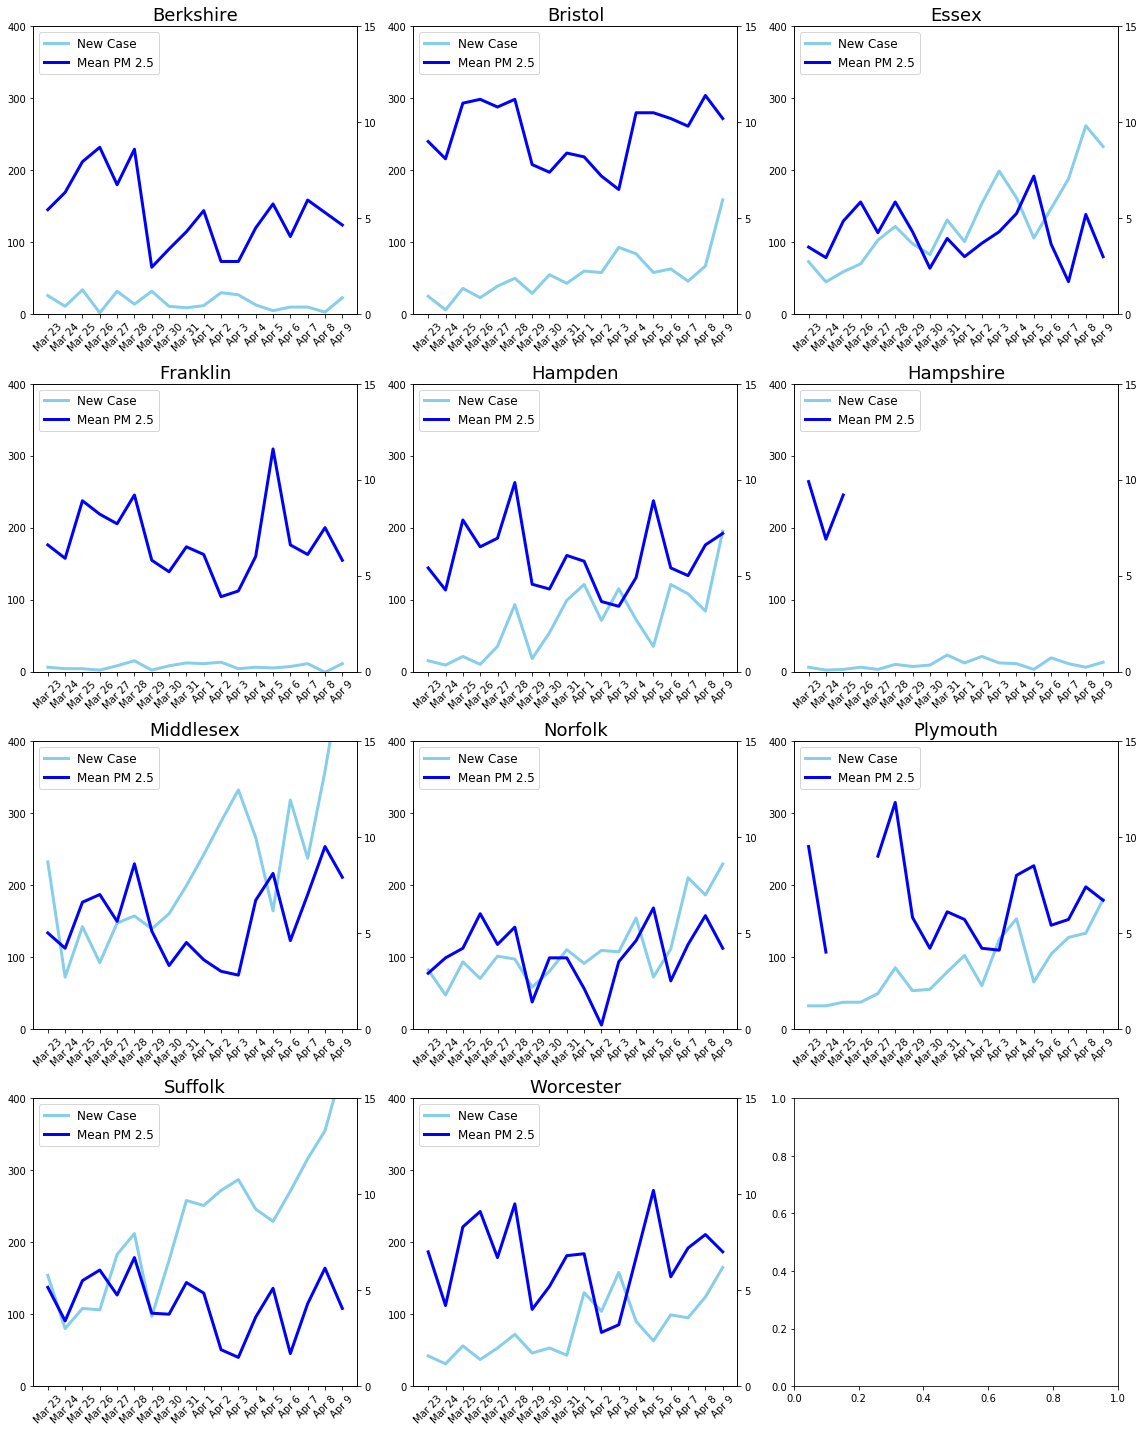

In [53]:
fig, ax1 = plt.subplots(4, 3, figsize=(16, 20))

list_day = ['Mar 23', 'Mar 24', 'Mar 25', 'Mar 26', 'Mar 27', 'Mar 28', 'Mar 29', 'Mar 30', 'Mar 31',
            'Apr 1', 'Apr 2', 'Apr 3', 'Apr 4', 'Apr 5', 'Apr 6', 'Apr 7', 'Apr 8', 'Apr 9']

for i in range(11):
    ax2 = ax1[i//3][i%3].twinx()
    
    ax1[i//3][i%3].plot(np.arange(len(list_day)), MA_newcases[i], color='skyblue', lw=3, label='New Case')
    ax2.plot(np.arange(len(list_day)), MA_pollution[i], color='blue', lw=3, label ='Mean PM 2.5')
    ax1[i//3][i%3].set_xticks(np.arange(len(list_day)))
    ax1[i//3][i%3].set_xticklabels(list_day, rotation = 45)
    ax1[i//3][i%3].set_ylim(0, 400)
    ax2.set_ylim(0, 15)
    ax1[i//3][i%3].set_yticks(np.linspace(0, 400, 5))
    ax2.set_yticks(np.linspace(0, 15, 4))
    ax1[i//3][i%3].set_title(counties[i], fontsize=18)
    h1, l1 = ax1[i//3][i%3].get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1[i//3][i%3].legend(h1+h2, l1+l2, loc='upper left',fontsize=12)

plt.tight_layout()

In [71]:
df_new_cases = pd.DataFrame(MA_newcases, columns=list_day, index=counties)

In [72]:
df_new_cases

,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29,Mar 30,Mar 31,Apr 1,Apr 2,Apr 3,Apr 4,Apr 5,Apr 6,Apr 7,Apr 8,Apr 9
Berkshire,26,11,34,2,32,14,32,11,9,12,30,27,13,5,10,10,3,23
Bristol,25,6,36,23,39,50,29,55,43,60,58,93,84,58,63,46,67,159
Essex,73,45,59,70,103,122,98,83,131,101,154,199,162,106,147,188,262,233
Franklin,6,4,4,2,8,15,2,8,12,11,13,4,6,5,7,11,-1,11
Hampden,15,9,21,10,35,93,18,54,99,121,71,115,72,35,121,108,84,195
Hampshire,6,2,3,6,3,10,7,9,23,12,21,12,11,3,19,11,6,13
Middlesex,232,72,142,92,147,157,139,160,199,242,288,332,266,164,318,237,358,500
Norfolk,82,47,93,70,101,97,58,80,110,91,109,107,154,72,111,210,186,229
Plymouth,32,32,37,37,49,85,53,55,79,102,60,124,153,65,104,127,133,180
Suffolk,154,80,108,106,183,212,97,175,258,251,272,287,246,229,271,316,355,441


In [77]:
df_PM2_5 = pd.DataFrame(MA_pollution, columns=list_day, index=counties)

In [78]:
df_PM2_5

,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29,Mar 30,Mar 31,Apr 1,Apr 2,Apr 3,Apr 4,Apr 5,Apr 6,Apr 7,Apr 8,Apr 9
Berkshire,5.45,6.35,7.95,8.70,6.75,8.60,2.45,3.40,4.30,5.40,2.75,2.75,4.50,5.75,4.05,5.95,5.30,4.65
Bristol,9.00,8.10,11.00,11.20,10.80,11.20,7.80,7.40,8.40,8.20,7.20,6.50,10.50,10.50,10.20,9.80,11.40,10.20
Essex,3.50,2.95,4.85,5.85,4.25,5.85,4.30,2.40,3.95,3.00,3.70,4.30,5.25,7.20,3.65,1.70,5.20,3.00
Franklin,6.60,5.90,8.90,8.20,7.70,9.20,5.80,5.20,6.50,6.10,3.90,4.20,6.00,11.60,6.60,6.10,7.50,5.80
Hampden,5.40,4.25,7.90,6.50,6.95,9.85,4.55,4.30,6.05,5.75,3.65,3.40,4.90,8.90,5.40,5.00,6.60,7.20
Hampshire,9.90,6.90,9.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middlesex,5.00,4.20,6.60,7.00,5.60,8.60,5.10,3.30,4.50,3.60,3.00,2.80,6.70,8.10,4.60,7.00,9.50,7.90
Norfolk,2.90,3.70,4.20,6.00,4.40,5.30,1.40,3.70,3.70,2.10,0.20,3.50,4.60,6.30,2.50,4.40,5.90,4.20
Plymouth,9.50,4.00,NaN,NaN,9.00,11.80,5.80,4.20,6.10,5.70,4.20,4.10,8.00,8.50,5.40,5.70,7.40,6.70
Suffolk,5.15,3.40,5.50,6.05,4.75,6.70,3.80,3.75,5.40,4.85,1.90,1.50,3.60,5.10,1.70,4.30,6.15,4.05
